# DAML 07 - Classification Exercise - Solution

Michal Grochmal <michal.grochmal@city.ac.uk>

Below are the import needed to replicate the Naive Bayes example.
The [`TfidfVectorizer`][tfidf] accepts an argument called `stop_words` which should be a list.
Find a file called `daml-07-extra-stopwords-en.txt` on moodle, download it
and read it in a way to construct a list from it.

Repeat the Naive Bayes example using the stop words injected into the TF-IDF preprocessing.
Do you get a better separation of the `religion.christianity` topic from the others
by using the stop words?

(★★☆)

[tfidf]: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
filename = 'daml-07-extra-stopwords-en.txt'
newsgroups = [
    'comp.graphics',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'rec.sport.hockey',
    'sci.med',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.misc',
]
train = fetch_20newsgroups(categories=newsgroups, subset='train')
test = fetch_20newsgroups(categories=newsgroups, subset='test')
train.target_names

['comp.graphics',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.sport.hockey',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.misc']

In [3]:
with open(filename) as f:
    stopwords = [l.strip() for l in f]
stopwords[:10]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [4]:
model_simple = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_stopwords = make_pipeline(TfidfVectorizer(stop_words=stopwords), MultinomialNB())
model_simple.fit(train.data, train.target)
model_stopwords.fit(train.data, train.target)
labels_simple = model_simple.predict(test.data)
labels_stopwords = model_stopwords.predict(test.data)

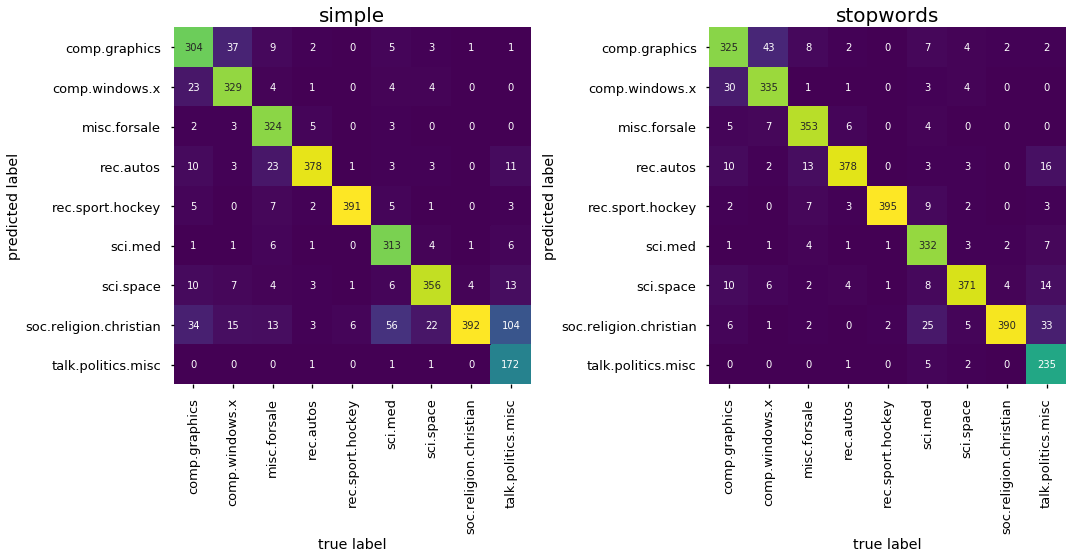

In [5]:
m_simple = confusion_matrix(test.target, labels_simple)
m_stopwords = confusion_matrix(test.target, labels_stopwords)
fig, axes = plt.subplots(1, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=0.5)
for mat, title, ax in zip([m_simple, m_stopwords], ['simple', 'stopwords'], axes.flat):
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='viridis', ax=ax, cbar=False,
                xticklabels=train.target_names, yticklabels=train.target_names)
    ax.set_xlabel('true label')
    ax.set_ylabel('predicted label')
    ax.set_title(title, fontsize=20)

In [6]:
print('Simple model F1 score:', f1_score(test.target, labels_simple, average='weighted'))
print('Stopwords model F1 score:', f1_score(test.target, labels_stopwords, average='weighted'))

Simple model F1 score: 0.853914083111938
Stopwords model F1 score: 0.8972449695434899


That is a big difference.  The F1 score has a considerable difference of ~5%, which is a very big
difference for machine learning standards.  But, moreover, we can see an even more interesting trend
in the confusion matrix: we managed to reduce the huge misclassification between religion and politics.

Now, that there is a magnitude of difference between correctly classified samples and
misclassified ones *in each and all classes*, we can say that we have built a quite
good classification model for the newsgroups.